In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# PART 1: Components of the logistic regression algorithm

### The Sigmoid Function

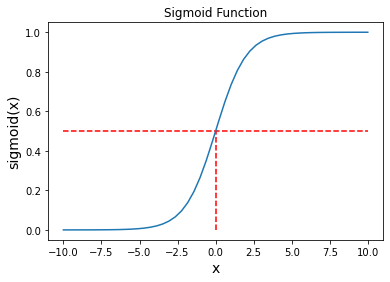

In [2]:
# Define an interval for x
x = np.linspace(-10,10)

# Calculate sigmoid of x
y = 1/(1+np.exp(-x))

plt.plot(x,y)
plt.title('Sigmoid Function')
plt.xlabel('x', fontsize = 14)
plt.ylabel('sigmoid(x)', fontsize = 14)
plt.hlines( y = 0.5, xmin = -10, xmax = 10, color='r', linestyle='--')
plt.vlines( x = 0.0, ymin = 0, ymax = 0.5, color='r', linestyle='--')
plt.show()

### The Loss Function

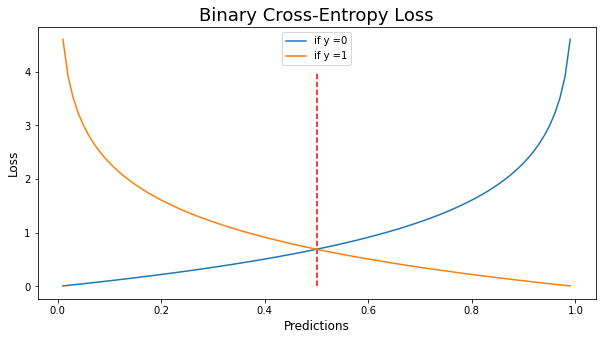

In [3]:
# Define an interval for y_hat values
x = np.linspace(0.01,0.99, 100)

loss_y0 = -np.log(1-x)
loss_y1 = -np.log(x)

plt.figure(figsize =(10,5))
plt.title('Binary Cross-Entropy Loss', fontsize= 18)
plt.plot(x,loss_y0, label = 'if y =0' )
plt.plot(x,loss_y1, label = 'if y =1' )
plt.legend(loc = 'upper center')
plt.xlabel('Predictions', fontsize= 12)
plt.ylabel('Loss', fontsize= 12)
plt.vlines(x = 0.5, ymin = 0, ymax = 4,color = 'red', linestyle='--')
plt.show()

# PART 2: Logistic regression implementation 

### Example 1 - Non overlapping classes 

In [19]:
# Generate the dataframe with the data
y_one = np.random.multivariate_normal([6,8],[[1,0],[0,1]], size = 100)
y_zero = np.random.multivariate_normal([1,3],[[1,0.3],[0.3,1]], size = 100)
df_zero = pd.DataFrame(y_zero, columns =['X1', 'X2'])
df_zero['class'] = 0
df_one = pd.DataFrame(y_one, columns = ['X1', 'X2'])
df_one['class'] = 1
df1 = df_zero.append(df_one, ignore_index = True)
df1 = df1.sample(frac=1).reset_index().drop('index', axis = 1)
df1.head()

,X1,X2,class
0,7.452972,8.120632,1
1,7.294817,6.947715,1
2,-0.314625,1.195477,0
3,6.063102,7.665484,1
4,0.269020,1.424075,0


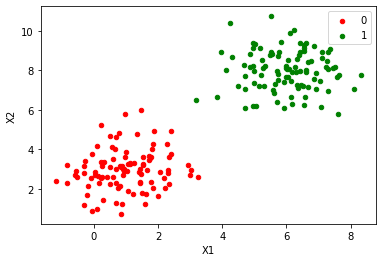

In [20]:
# Plot the data
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}
grouped = df1.groupby('class')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X1', y='X2', label=key, color=colors[key])

In [50]:
# Number of rows
n = len(df1)

# Initialize the weight matrix
W = np.random.random((3,1))

# Create the matrix X: note the addition of a columns of ones to calculated W0
X_df = df1[['X1', 'X2']].values
print(X_df[:5], '\n')  # Original array of data 
X = np.concatenate([np.ones((n, 1)), X_df], axis= 1)
print(X[:5])           # Modified array of data with columns of ones

# Get the label columns
y = df1[['class']].values

[[ 7.45297181  8.12063161]
 [ 7.29481736  6.94771528]
 [-0.31462537  1.19547744]
 [ 6.0631017   7.66548443]
 [ 0.26902037  1.42407459]] 

[[ 1.          7.45297181  8.12063161]
 [ 1.          7.29481736  6.94771528]
 [ 1.         -0.31462537  1.19547744]
 [ 1.          6.0631017   7.66548443]
 [ 1.          0.26902037  1.42407459]]


In [51]:
# Handy functions:
# Function that calculates the loss
def binary_cross_entropy(obs, predictions):
    return -1/n * np.sum([obs * np.log(predictions) + (1 - obs)*np.log(1 - predictions)])

# Function that returns gradients  
def gradients(X, predictions, observed):
    return np.dot(X.T, (predictions-observed))/ n

# Function that returns predictions 
def make_predictions(X, W):
    z = np.dot(X, W)
    return 1/(1 + np.exp(-z))

In [52]:
# Initialize an empty list for collecting the loss at each iteration 
Loss_list = []

# Initialize an empty list for collecting the weight matrix at each iteration 
w_list = []
w_list.append(list(W.flatten())) # Append the initial values for W

# Set the learning rate 
learning_rate = 0.2

# Set the number of iterations
n_iters = 750

# Append the starting Ws
w_list.append(list(W.flatten()))

# Training loop
for it in range(n_iters):
    # Calculate predictions
    predictions = make_predictions(X, W)
    
    # Calculate loss
    loss = binary_cross_entropy(y, predictions)
    Loss_list.append(loss)
    # Calculate gradients
    grads = gradients(X, predictions, y)
    
    # Updated the weight matrix
    W -=  learning_rate* grads
    w_list.append(list(W.flatten()))


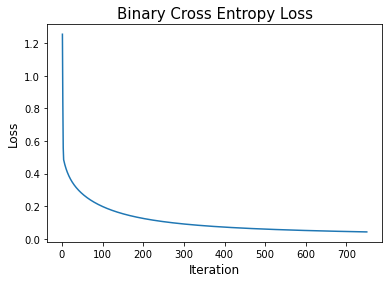

In [53]:
# Plot the loss during training
plt.plot(np.arange(1, n_iters+1), Loss_list)
plt.title('Binary Cross Entropy Loss', fontsize = 15)
plt.xlabel('Iteration', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.show()

In [54]:
# Calculate the prediction of the trained model
trained_predictions_prob = make_predictions(X, W)

# Convert probability to class
predictions = np.where(trained_predictions_prob > 0.5,  1, 0)

# Plot confusion vector
confusion_matrix(y, predictions)

array([[100,   0],
       [  0, 100]], dtype=int64)

**The trained model is 100% accurate**

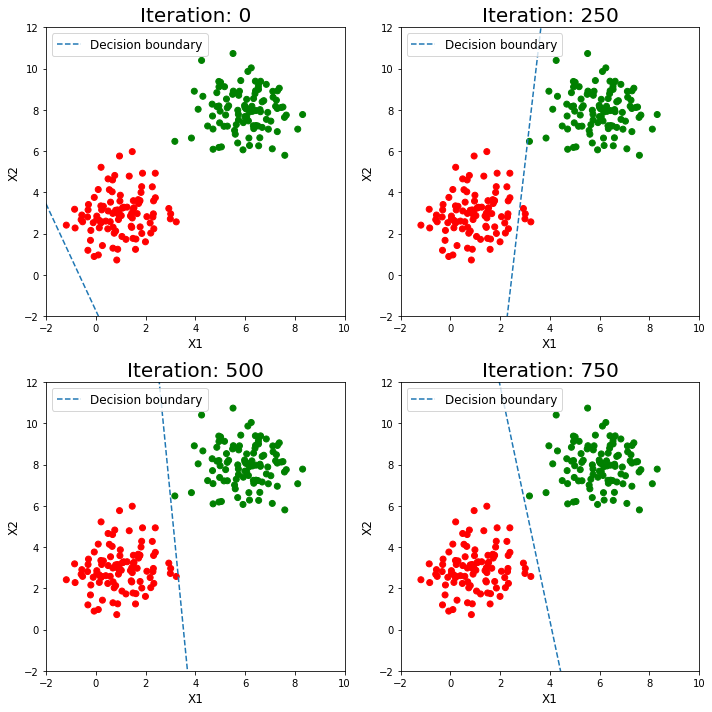

In [55]:
# Plotting the decision boundary at iteration 0, 500, 1000, 1500 and 2000
# On decision boundary p = 0.5 --> exp(-z) = 0 --> z = 1 
# Let's pick X1 = -2, X1 = 10 (sort of in the middle of the graph). 
# We calculate X2 using W at that iterations 
X1a = -2  # This is multiplied for W2
X1b = 10  # This is multiplied for W1
X0 = 1   # This is multiplied for W0 

# Color dictionary
color_map = {0: 'red', 1: 'green'}

plt.figure(figsize =(10,10))
for a, i in enumerate(range(0,1000, 250)):
    W = w_list[i]
    X2a = (- X0*W[0] - X1a*W[1])/ W[2]
    X2b = (- X0*W[0] - X1b*W[1])/ W[2]
    plt.subplot(2,2,a+1)
    plt.title('Iteration: ' +str(i), fontsize = 20)
    plt.scatter(df1['X1'], df1['X2'], c=df1['class'].map(color_map))
    plt.plot([X1a, X1b],[X2a, X2b], linestyle = '--', label = 'Decision boundary')
    plt.xlabel('X1', fontsize = 12)
    plt.ylabel('X2', fontsize = 12)
    plt.xlim([-2,10])
    plt.ylim([-2,12])
    plt.legend(prop={'size': 12}, loc='upper left')
    
plt.tight_layout()
plt.show()

**Success!! The final decision boundary is a line that nicelly separates the two classes**

# --------------------------------------------------------------------------------------------

### Example 2 - Overlapping classes 

In [34]:
# Generate the dataframe with the data
y_one = np.random.multivariate_normal([6,1],[[2,0],[0,2]], size = 100)
y_zero = np.random.multivariate_normal([1,2],[[3,0],[0,3]], size = 100)
df_zero = pd.DataFrame(y_zero, columns =['X1', 'X2'])
df_zero['class'] = 0
df_one = pd.DataFrame(y_one, columns = ['X1', 'X2'])
df_one['class'] = 1
df2 = df_zero.append(df_one, ignore_index = True)
df2 = df2.sample(frac=1).reset_index().drop('index', axis = 1)
df2.head()

,X1,X2,class
0,8.531764,0.828324,1
1,4.482329,-1.201356,1
2,7.858770,-1.183953,1
3,5.421055,1.407615,1
4,1.852290,1.285231,0


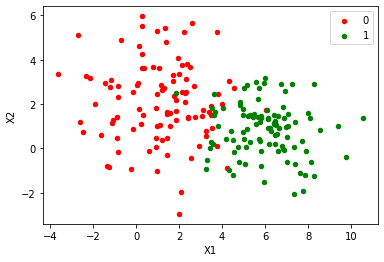

In [35]:
# Plot the data
fig, ax = plt.subplots()

colors = {0:'red', 1:'green'}
grouped = df2.groupby('class')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X1', y='X2', label=key, color=colors[key])

In [36]:
# Number of rows
n = len(df2)

# Initialize the weight vector
W = np.random.random((3,1))

# Create the matrix X: note the addition of a columns of ones to calculated W0
X_df = df2[['X1', 'X2']].values
print(X_df[:5], '\n')  # Original array of data 
X = np.concatenate([np.ones((n, 1)), X_df], axis= 1)
print(X[:5])           # Modified array of data with columns of ones

# Get the label columns
y = df2[['class']].values

[[ 8.53176429  0.82832363]
 [ 4.48232852 -1.20135649]
 [ 7.85877047 -1.18395311]
 [ 5.42105474  1.40761534]
 [ 1.85229006  1.28523141]] 

[[ 1.          8.53176429  0.82832363]
 [ 1.          4.48232852 -1.20135649]
 [ 1.          7.85877047 -1.18395311]
 [ 1.          5.42105474  1.40761534]
 [ 1.          1.85229006  1.28523141]]


In [37]:
# Initialize an empty list for collecting the loss at each iteration 
Loss_list = []

# Inialiaze an empty list for collecting the weight matrix at each iteration 
w_list = []
w_list.append(list(W.flatten())) # Append the initial values for W

# Set the learning rate 
learning_rate = 0.1

# Set the number of iterations
n_iters = 750

w_list.append(list(W.flatten()))
for it in range(n_iters):
    # Calculate predictions
    predictions = make_predictions(X, W)
    
    # Calculate loss
    loss = binary_cross_entropy(y, predictions)
    Loss_list.append(loss)
    # Calculate gradients
    grads = gradients(X, predictions, y)
    
    # Updated the weight matrix
    W -=  learning_rate* grads
    w_list.append(list(W.flatten()))

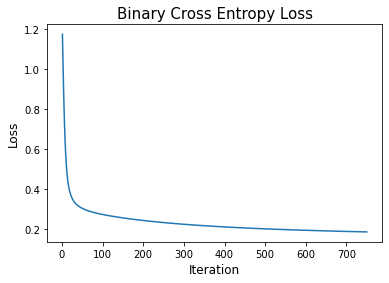

In [38]:
# Plot the loss during training
plt.plot(np.arange(1, n_iters+1), Loss_list)
plt.title('Binary Cross Entropy Loss', fontsize = 15)
plt.xlabel('Iteration', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.show()

In [39]:
# Calculate the prediction of the trained model
trained_predictions_prob = make_predictions(X, W)

# Convert probability to class
predictions = np.where(trained_predictions_prob > 0.5,  1, 0)

# Plot confusion matrix
confusion_matrix(y, predictions)

array([[89, 11],
       [ 3, 97]], dtype=int64)

**The trained model is 93% accurate**

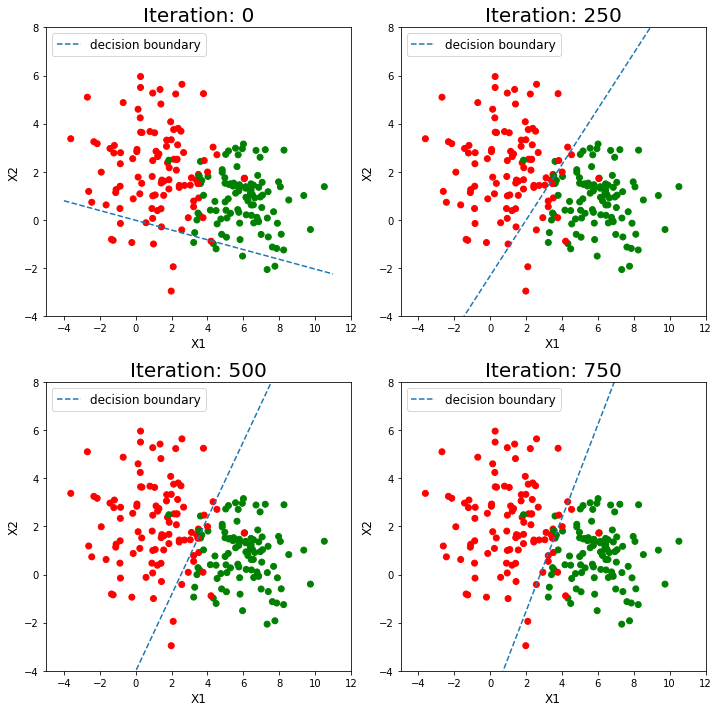

In [49]:
# Plotting the decision boundary at iteration 0, 500, 1000, 1500 and 2000
# On decision boundary p = 0.5 --> exp(-z) = 0 --> z = 1 
# Let's pick X1 = -4, X1 = 11 (sort of in the middle of the graph). 
# We calculate X2 using W at that iterations 
X1a = -4  # This is multiplied for W2
X1b = 11  # This is multiplied for W1
X0 = 1    # This is multiplied for W0 

# Color dictionary
color_map = {0: 'red', 1: 'green'}

plt.figure(figsize =(10,10))
for a, i in enumerate(range(0,1000, 250)):
    W = w_list[i]
    X2a = (- X0*W[0] - X1a*W[1])/ W[2]
    X2b = (- X0*W[0] - X1b*W[1])/ W[2]
    plt.subplot(2,2,a+1)
    plt.title('Iteration: ' +str(i), fontsize = 20)
    plt.scatter(df2['X1'], df2['X2'], c=df2['class'].map(color_map))
    plt.plot([X1a, X1b],[X2a, X2b], linestyle = '--', label = 'decision boundary')
    plt.xlabel('X1', fontsize = 12)
    plt.ylabel('X2', fontsize = 12)
    plt.xlim([-5,12])
    plt.ylim([-4,8])
    plt.legend(prop={'size': 12}, loc='upper left')
    
plt.tight_layout()
plt.show()